In [538]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from regressors import stats
import statsmodels as sm
import statsmodels.api as sm

In [539]:
df = pd.read_csv('Carseats.csv')

In [540]:
df.describe()

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,115.614301,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,1.000000,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,100.750000,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,200.500000,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,300.250000,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,400.000000,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [541]:
df.head()

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [542]:
df.columns

Index(['Unnamed: 0', 'Sales', 'CompPrice', 'Income', 'Advertising',
       'Population', 'Price', 'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [543]:
df.dtypes

Unnamed: 0       int64
Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [544]:
df.describe(include='object')

,ShelveLoc,Urban,US
count,400,400,400
unique,3,2,2
top,Medium,Yes,Yes
freq,219,282,258


In [545]:
data = df.copy()

In [546]:
data = data.drop(['Unnamed: 0'],axis=1)

In [547]:
data = pd.get_dummies(data,drop_first=True)

In [548]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,42,17,0,0,1,1
1,11.22,111,48,16,260,83,65,10,1,0,1,1
2,10.06,113,35,10,269,80,59,12,0,1,1,1
3,7.40,117,100,4,466,97,55,14,0,1,1,1
4,4.15,141,64,3,340,128,38,13,0,0,1,0


In [549]:
data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'Urban_Yes',
       'US_Yes'],
      dtype='object')

In [550]:
X = data[['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'Urban_Yes', 'US_Yes']]
y = data['Sales']

In [551]:
X.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'Urban_Yes',
       'US_Yes'],
      dtype='object')

In [552]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [553]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [554]:
regressor.coef_

array([ 9.45417995e-02,  1.49369315e-02,  1.32799576e-01, -6.94152397e-05,
       -9.79111946e-02, -4.62223918e-02, -5.40163448e-02,  4.92254145e+00,
        2.00648674e+00,  9.55980383e-02, -2.98289171e-01])

In [555]:

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df


,Coefficient
CompPrice,0.094542
Income,0.014937
Advertising,0.132800
Population,-0.000069
Price,-0.097911
Age,-0.046222
Education,-0.054016
ShelveLoc_Good,4.922541
ShelveLoc_Medium,2.006487
Urban_Yes,0.095598


In [556]:
regressor.intercept_ 

6.325250608694508

In [557]:
regressor.score(X,y)

0.8717769672610607

In [558]:
y_pred = regressor.predict(X_test)

In [559]:
RSS = ((y_pred - y_test)**2).sum()
RSS

105.65554155109899

In [560]:

corrections = pd.DataFrame({'Actual': y_test,'Predict':y_pred})
corrections


,Actual,Predict
132,9.54,8.157333
309,11.18,9.941326
341,7.38,6.396745
196,4.10,2.385102
246,6.90,7.551922
60,8.32,7.585123
155,7.71,8.139206
261,5.71,5.854328
141,6.53,5.330237
214,4.83,6.291140


In [561]:
features_name = list(X.columns)

In [562]:
#stats.summary(regressor.coef_ , X , y,features_name)

In [563]:
X.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'Urban_Yes',
       'US_Yes'],
      dtype='object')

In [564]:
import statsmodels.api as sm 

In [565]:
model = sm.OLS(y,X).fit()

In [566]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     1801.
Date:                Thu, 13 Feb 2020   Prob (F-statistic):               0.00
Time:                        03:05:33   Log-Likelihood:                -609.87
No. Observations:                 400   AIC:                             1242.
Df Residuals:                     389   BIC:                             1286.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
CompPrice            0.1159      0.004     31.356      0.000       0.109       0.123
Income               0.0209      0.002     10.738      0.000       0.017       0.025
Advertising          0.1162      0.012      9.462      0.000       0.092       0.140
Population           0.0012      0.000      3.190      0.002       0.000       0.002
Price               -0.0950      0.003    -32.156      0.000      -0.101      -0.089
Age                 -0.0356      0.003    -10.795      0.000      -0.042      -0.029
Education            0.0688      0.019      3.608      0.000       0.031       0.106
ShelveLoc_Good       5.0276      0.168     29.914      0.000       4.697       5.358
ShelveLoc_Medium     2.1366      0.138     15.497      0.000       1.866       2.408
Urban_Yes            0.2296      0.124      1.847      0.066      -0.015       0.474
US_Yes              -0.0333      0.165     -0.202      0.840      -0.357       0.291
==============================================================================
Omnibus:                        0.981   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.612   Jarque-Bera (JB):                1.009
Skew:                          -0.007   Prob(JB):                        0.604
Kurtosis:                       2.754   Cond. No.                     1.20e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [567]:
x = sm.add_constant(X)

C:\Users\sony\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [568]:
model = sm.OLS(y,X).fit()

In [569]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     1801.
Date:                Thu, 13 Feb 2020   Prob (F-statistic):               0.00
Time:                        03:05:33   Log-Likelihood:                -609.87
No. Observations:                 400   AIC:                             1242.
Df Residuals:                     389   BIC:                             1286.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
CompPrice            0.1159      0.004     31.356      0.000       0.109       0.123
Income               0.0209      0.002     10.738      0.000       0.017       0.025
Advertising          0.1162      0.012      9.462      0.000       0.092       0.140
Population           0.0012      0.000      3.190      0.002       0.000       0.002
Price               -0.0950      0.003    -32.156      0.000      -0.101      -0.089
Age                 -0.0356      0.003    -10.795      0.000      -0.042      -0.029
Education            0.0688      0.019      3.608      0.000       0.031       0.106
ShelveLoc_Good       5.0276      0.168     29.914      0.000       4.697       5.358
ShelveLoc_Medium     2.1366      0.138     15.497      0.000       1.866       2.408
Urban_Yes            0.2296      0.124      1.847      0.066      -0.015       0.474
US_Yes              -0.0333      0.165     -0.202      0.840      -0.357       0.291
==============================================================================
Omnibus:                        0.981   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.612   Jarque-Bera (JB):                1.009
Skew:                          -0.007   Prob(JB):                        0.604
Kurtosis:                       2.754   Cond. No.                     1.20e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [570]:
data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'Urban_Yes',
       'US_Yes'],
      dtype='object')

AttributeError: 'AxesSubplot' object has no attribute 'show'

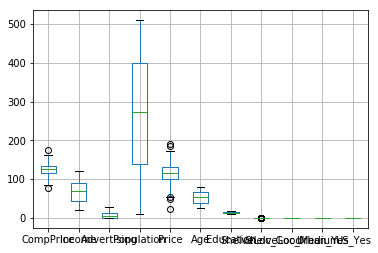

In [571]:
X.boxplot().show()

In [572]:
data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'Urban_Yes',
       'US_Yes'],
      dtype='object')

In [573]:
#data2 = data.drop('ShelveLoc_Good',axis=1)
#data2.columns

In [574]:
def remove_outliers(df_in,col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1
    fence_low = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [575]:
data_outlier = remove_outliers(data,'Sales')

In [576]:

data_outlier = remove_outliers(data_outlier,'CompPrice')

data_outlier = remove_outliers(data_outlier,'Income')

data_outlier = remove_outliers(data_outlier,'Advertising')

data_outlier = remove_outliers(data_outlier,'Population')

data_outlier = remove_outliers(data_outlier,'Price')

data_outlier = remove_outliers(data_outlier,'Age')

data_outlier = remove_outliers(data_outlier,'Education')

#data_outlier = remove_outliers(data_outlier,'ShelveLoc_Good')

data_outlier = remove_outliers(data_outlier,'ShelveLoc_Medium')

data_outlier = remove_outliers(data_outlier,'Urban_Yes')

data_outlier = remove_outliers(data_outlier,'US_Yes')


In [577]:
data_outlier.shape

(389, 12)

In [578]:
data_outlier.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,42,17,0,0,1,1
1,11.22,111,48,16,260,83,65,10,1,0,1,1
2,10.06,113,35,10,269,80,59,12,0,1,1,1
3,7.40,117,100,4,466,97,55,14,0,1,1,1
4,4.15,141,64,3,340,128,38,13,0,0,1,0


In [579]:
data2 = data_outlier

In [580]:
#plt.boxplot(data2).show()

AttributeError: 'AxesSubplot' object has no attribute 'show'

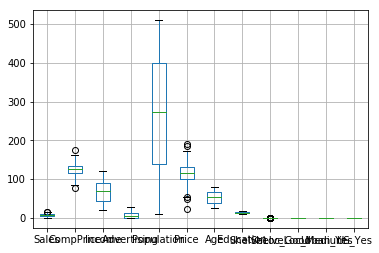

In [581]:
data.boxplot().show()

In [582]:
data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'Urban_Yes',
       'US_Yes'],
      dtype='object')

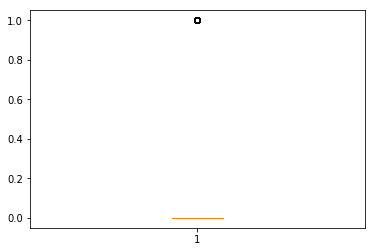

In [583]:
plt.boxplot(data['ShelveLoc_Good'])
plt.show()

In [584]:
X = data2[['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'Urban_Yes',
       'US_Yes']]
y = data2['Sales']

In [585]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

In [586]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [587]:
y_pred = regressor.predict(X_test)

In [588]:
comparisson = pd.DataFrame({'Actual':y_test,'Pred':y_pred})
comparisson

,Actual,Pred
56,11.91,10.847151
127,6.52,6.604280
270,11.99,12.424974
181,7.43,8.371614
289,8.75,8.090319
219,10.62,10.951070
311,6.15,6.674046
288,6.98,5.787022
102,5.30,5.669799
202,4.10,3.706966


In [589]:
features_name = list(X.columns)

In [590]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
CompPrice,0.095955
Income,0.017575
Advertising,0.127296
Population,0.000049
Price,-0.096285
Age,-0.047044
Education,-0.029651
ShelveLoc_Good,4.947452
ShelveLoc_Medium,1.908625
Urban_Yes,0.276179


In [591]:
regressor.intercept_

5.400690770145827

In [592]:
regressor.score(X,y)

0.8594018908089928

In [593]:
print(((y_pred - y_test)**2).sum())

88.50882288639689


In [594]:
model = sm.OLS(y,X).fit()

In [595]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     1717.
Date:                Thu, 13 Feb 2020   Prob (F-statistic):          6.66e-315
Time:                        03:06:37   Log-Likelihood:                -592.29
No. Observations:                 389   AIC:                             1207.
Df Residuals:                     378   BIC:                             1250.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
CompPrice            0.1156      0.004     30.346      0.000       0.108       0.123
Income               0.0205      0.002     10.397      0.000       0.017       0.024
Advertising          0.1207      0.013      9.548      0.000       0.096       0.146
Population           0.0011      0.000      2.898      0.004       0.000       0.002
Price               -0.0929      0.003    -29.440      0.000      -0.099      -0.087
Age                 -0.0358      0.003    -10.753      0.000      -0.042      -0.029
Education            0.0618      0.020      3.147      0.002       0.023       0.100
ShelveLoc_Good       4.9460      0.171     28.911      0.000       4.610       5.282
ShelveLoc_Medium     2.1038      0.139     15.082      0.000       1.829       2.378
Urban_Yes            0.2037      0.126      1.618      0.107      -0.044       0.451
US_Yes              -0.0782      0.168     -0.466      0.642      -0.408       0.252
==============================================================================
Omnibus:                        0.483   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.786   Jarque-Bera (JB):                0.599
Skew:                           0.002   Prob(JB):                        0.741
Kurtosis:                       2.808   Cond. No.                     1.21e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [596]:
x = sm.add_constant(X)

C:\Users\sony\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [597]:
model = sm.OLS(y,X).fit()

In [598]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     1717.
Date:                Thu, 13 Feb 2020   Prob (F-statistic):          6.66e-315
Time:                        03:06:41   Log-Likelihood:                -592.29
No. Observations:                 389   AIC:                             1207.
Df Residuals:                     378   BIC:                             1250.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
CompPrice            0.1156      0.004     30.346      0.000       0.108       0.123
Income               0.0205      0.002     10.397      0.000       0.017       0.024
Advertising          0.1207      0.013      9.548      0.000       0.096       0.146
Population           0.0011      0.000      2.898      0.004       0.000       0.002
Price               -0.0929      0.003    -29.440      0.000      -0.099      -0.087
Age                 -0.0358      0.003    -10.753      0.000      -0.042      -0.029
Education            0.0618      0.020      3.147      0.002       0.023       0.100
ShelveLoc_Good       4.9460      0.171     28.911      0.000       4.610       5.282
ShelveLoc_Medium     2.1038      0.139     15.082      0.000       1.829       2.378
Urban_Yes            0.2037      0.126      1.618      0.107      -0.044       0.451
US_Yes              -0.0782      0.168     -0.466      0.642      -0.408       0.252
==============================================================================
Omnibus:                        0.483   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.786   Jarque-Bera (JB):                0.599
Skew:                           0.002   Prob(JB):                        0.741
Kurtosis:                       2.808   Cond. No.                     1.21e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [599]:
feature_name = list(X.columns)

In [600]:
#stats.summary(regressor.coef_,X,y,feature_name)